In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras import Model
import numpy as np
from matplotlib import pyplot as plt
import tensorboard
%load_ext tensorboard

In [2]:
def get_data():
    #filename = os.path.abspath(os.path.join(os.path.dirname( __file__ ), 'data', 'processed', 'cases_with_population_and_hospital.csv'))
    filename = 'data/processed/timestamped_cases_with_population_and_hospital.csv'
    data = np.genfromtxt(filename, delimiter=',')
    np.random.shuffle(data)
    return data

def get_sliced_data(data):
    result = {}
    train_x1 = data[:10000, :4]
    result['train_x1'] = train_x1[:, :, np.newaxis]
    result['train_x2'] = data[:10000, 4:13]
    result['train_y'] = data[:10000, 13]
    test_x1 = data[260000:, :4]
    result['test_x1'] = test_x1[:, :, np.newaxis]
    result['test_x2'] = data[260000:, 4:13]
    result['test_y'] = data[260000:, 13]

    return result

In [3]:
datas = get_sliced_data(get_data())

In [4]:
def make_model():
    inp1 = Input(shape=(4, 1))
    inp2 = Input(shape=(9,))

    x = LSTM(64, activation='relu')(inp1)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(8, activation='relu')(x)

    y = Dense(64, activation='relu')(inp2)
    y = Dropout(0.5)(y)
    y = Dense(32, activation='relu')(y)
    y = Dropout(0.5)(y)
    y = Dense(16, activation='relu')(y)
    y = Dropout(0.5)(y)
    y = Dense(8, activation='relu')(y)

    z = Concatenate()([x, y])
    z = Dense(16, activation='relu')(z)
    z = Dropout(0.5)(z)
    z = Dense(8, activation='relu')(z)
    z = Dropout(0.5)(z)
    z = Dense(4, activation='relu')(z)
    z = Dropout(0.5)(z)
    z = Dense(2, activation='relu')(z)

    out = Dense(1)(z)

    model = Model(inputs=[inp1, inp2], outputs=out)
    
    model.compile(optimizer='adam',
                  loss=MeanSquaredError(),
                  metrics=['mean_squared_error'])
    
    return model

def make_call_back():
    checkpoint_path = 'model/model.ckpt'
    return tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True,
                                              verbose=1)


def fit_model(model, datas, epochs, cp_callback=False, weights=False, checkpoint_path='model/model.ckpt'):
    inp1 = datas['train_x1']
    inp2 = datas['train_x2']
    out = datas['train_y']

    logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

    if weights:
        model.load_weights(checkpoint_path)
    
    if cp_callback:
        history = model.fit([inp1, inp2], [out], epochs=epochs, callbacks=[make_call_back(), tensorboard_callback])
    else:
        history = model.fit([inp1, inp2], [out], epochs=epochs)
    
    return model, history, logdir


model = make_model()

In [ ]:
def make_plot(history):
    plt.plot(history.history['mean_squared_error'])
    plt.show()


def test_model(model, datas):
    inp1 = datas['test_x1']
    inp2 = datas['test_x2']
    out = datas['test_y']
    test_loss, test_acc = model.evaluate([inp1, inp2], out, verbose=2)
    return test_loss, test_acc

In [ ]:
model, history, logdir = fit_model(model, datas, 1000, cp_callback=True, weights=True)

Epoch 1/1000
312/313 [============================>.] - ETA: 0s - loss: 29520.2188 - mean_squared_error: 29520.2188
Epoch 00001: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29474.2363 - mean_squared_error: 29474.2363
Epoch 2/1000
307/313 [============================>.] - ETA: 0s - loss: 29768.2539 - mean_squared_error: 29768.2539
Epoch 00002: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29474.2656 - mean_squared_error: 29474.2656
Epoch 3/1000
291/313 [==========================>...] - ETA: 0s - loss: 30629.3750 - mean_squared_error: 30629.3750
Epoch 00003: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29474.2305 - mean_squared_error: 29474.2305
Epoch 4/1000
289/313 [==========================>...] - ETA: 0s - loss: 27754.6133 - mean_squared_error: 27754.6133
Epoch 00004: saving model to model\model.ckpt
313/313 [======================

311/313 [============================>.] - ETA: 0s - loss: 29428.3691 - mean_squared_error: 29428.3691
Epoch 00030: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.9258 - mean_squared_error: 29473.9258
Epoch 31/1000
289/313 [==========================>...] - ETA: 0s - loss: 28334.2480 - mean_squared_error: 28334.2480
Epoch 00031: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.9199 - mean_squared_error: 29473.9199
Epoch 32/1000
309/313 [============================>.] - ETA: 0s - loss: 29693.2695 - mean_squared_error: 29693.2695
Epoch 00032: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.9004 - mean_squared_error: 29473.9004
Epoch 33/1000
311/313 [============================>.] - ETA: 0s - loss: 29577.8945 - mean_squared_error: 29577.8945
Epoch 00033: saving model to model\model.ckpt
313/313 [==============================] 

303/313 [============================>.] - ETA: 0s - loss: 27786.4414 - mean_squared_error: 27786.4414
Epoch 00060: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.7598 - mean_squared_error: 29473.7598
Epoch 61/1000
313/313 [==============================] - ETA: 0s - loss: 29473.7539 - mean_squared_error: 29473.7539
Epoch 00061: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.7539 - mean_squared_error: 29473.7539
Epoch 62/1000
291/313 [==========================>...] - ETA: 0s - loss: 29654.7969 - mean_squared_error: 29654.7969
Epoch 00062: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.7441 - mean_squared_error: 29473.7441
Epoch 63/1000
287/313 [==========================>...] - ETA: 0s - loss: 30716.1992 - mean_squared_error: 30716.1992
Epoch 00063: saving model to model\model.ckpt
313/313 [==============================] 

309/313 [============================>.] - ETA: 0s - loss: 29766.1328 - mean_squared_error: 29766.1328
Epoch 00090: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.6777 - mean_squared_error: 29473.6777
Epoch 91/1000
308/313 [============================>.] - ETA: 0s - loss: 29872.9082 - mean_squared_error: 29872.9082
Epoch 00091: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.6484 - mean_squared_error: 29473.6484
Epoch 92/1000
291/313 [==========================>...] - ETA: 0s - loss: 28465.8613 - mean_squared_error: 28465.8613
Epoch 00092: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.6543 - mean_squared_error: 29473.6543
Epoch 93/1000
309/313 [============================>.] - ETA: 0s - loss: 29762.9512 - mean_squared_error: 29762.9512
Epoch 00093: saving model to model\model.ckpt
313/313 [==============================] 

307/313 [============================>.] - ETA: 0s - loss: 28840.6250 - mean_squared_error: 28840.6250
Epoch 00120: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.6152 - mean_squared_error: 29473.6152
Epoch 121/1000
309/313 [============================>.] - ETA: 0s - loss: 29729.3398 - mean_squared_error: 29729.3398
Epoch 00121: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.6094 - mean_squared_error: 29473.6094
Epoch 122/1000
287/313 [==========================>...] - ETA: 0s - loss: 31063.2402 - mean_squared_error: 31063.2402
Epoch 00122: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.6035 - mean_squared_error: 29473.6035
Epoch 123/1000
292/313 [==========================>...] - ETA: 0s - loss: 30032.3008 - mean_squared_error: 30032.3008
Epoch 00123: saving model to model\model.ckpt
313/313 [=============================

289/313 [==========================>...] - ETA: 0s - loss: 27561.7109 - mean_squared_error: 27561.7109
Epoch 00150: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5781 - mean_squared_error: 29473.5781
Epoch 151/1000
290/313 [==========================>...] - ETA: 0s - loss: 30149.2969 - mean_squared_error: 30149.2969
Epoch 00151: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5801 - mean_squared_error: 29473.5801
Epoch 152/1000
289/313 [==========================>...] - ETA: 0s - loss: 30619.0371 - mean_squared_error: 30619.0371
Epoch 00152: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5840 - mean_squared_error: 29473.5840
Epoch 153/1000
287/313 [==========================>...] - ETA: 0s - loss: 29801.5254 - mean_squared_error: 29801.5254
Epoch 00153: saving model to model\model.ckpt
313/313 [=============================

290/313 [==========================>...] - ETA: 0s - loss: 30071.5801 - mean_squared_error: 30071.5801
Epoch 00180: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5586 - mean_squared_error: 29473.5586
Epoch 181/1000
290/313 [==========================>...] - ETA: 0s - loss: 29371.4961 - mean_squared_error: 29371.4961
Epoch 00181: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 182/1000
293/313 [===========================>..] - ETA: 0s - loss: 29942.2148 - mean_squared_error: 29942.2148
Epoch 00182: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 183/1000
289/313 [==========================>...] - ETA: 0s - loss: 28914.6934 - mean_squared_error: 28914.6934
Epoch 00183: saving model to model\model.ckpt
313/313 [=============================

285/313 [==========================>...] - ETA: 0s - loss: 26919.5938 - mean_squared_error: 26919.5938
Epoch 00210: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 211/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 00211: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 212/1000
289/313 [==========================>...] - ETA: 0s - loss: 31447.7715 - mean_squared_error: 31447.7715
Epoch 00212: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 213/1000
286/313 [==========================>...] - ETA: 0s - loss: 26675.6152 - mean_squared_error: 26675.6152
Epoch 00213: saving model to model\model.ckpt
313/313 [=============================

290/313 [==========================>...] - ETA: 0s - loss: 27290.8125 - mean_squared_error: 27290.8125
Epoch 00240: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 241/1000
291/313 [==========================>...] - ETA: 0s - loss: 27233.9141 - mean_squared_error: 27233.9141
Epoch 00241: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 242/1000
285/313 [==========================>...] - ETA: 0s - loss: 29786.9199 - mean_squared_error: 29786.9199
Epoch 00242: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5449 - mean_squared_error: 29473.5449
Epoch 243/1000
311/313 [============================>.] - ETA: 0s - loss: 29539.9688 - mean_squared_error: 29539.9688
Epoch 00243: saving model to model\model.ckpt
313/313 [=============================

287/313 [==========================>...] - ETA: 0s - loss: 27919.2637 - mean_squared_error: 27919.2637
Epoch 00270: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 271/1000
309/313 [============================>.] - ETA: 0s - loss: 29724.9863 - mean_squared_error: 29724.9863
Epoch 00271: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5332 - mean_squared_error: 29473.5332
Epoch 272/1000
305/313 [============================>.] - ETA: 0s - loss: 29616.7832 - mean_squared_error: 29616.7832
Epoch 00272: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5352 - mean_squared_error: 29473.5352
Epoch 273/1000
310/313 [============================>.] - ETA: 0s - loss: 29513.2266 - mean_squared_error: 29513.2266
Epoch 00273: saving model to model\model.ckpt
313/313 [=============================

287/313 [==========================>...] - ETA: 0s - loss: 27743.6523 - mean_squared_error: 27743.6523
Epoch 00300: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 301/1000
291/313 [==========================>...] - ETA: 0s - loss: 30022.1855 - mean_squared_error: 30022.1855
Epoch 00301: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 302/1000
286/313 [==========================>...] - ETA: 0s - loss: 29061.2871 - mean_squared_error: 29061.2871
Epoch 00302: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 303/1000
289/313 [==========================>...] - ETA: 0s - loss: 31099.2148 - mean_squared_error: 31099.2148
Epoch 00303: saving model to model\model.ckpt
313/313 [=============================

311/313 [============================>.] - ETA: 0s - loss: 29605.5332 - mean_squared_error: 29605.5332
Epoch 00330: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 331/1000
311/313 [============================>.] - ETA: 0s - loss: 29608.2148 - mean_squared_error: 29608.2148
Epoch 00331: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5430 - mean_squared_error: 29473.5430
Epoch 332/1000
289/313 [==========================>...] - ETA: 0s - loss: 26872.4102 - mean_squared_error: 26872.4102
Epoch 00332: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 333/1000
307/313 [============================>.] - ETA: 0s - loss: 29834.0547 - mean_squared_error: 29834.0547
Epoch 00333: saving model to model\model.ckpt
313/313 [=============================

288/313 [==========================>...] - ETA: 0s - loss: 29355.0898 - mean_squared_error: 29355.0898
Epoch 00360: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 361/1000
291/313 [==========================>...] - ETA: 0s - loss: 28485.2637 - mean_squared_error: 28485.2637
Epoch 00361: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 362/1000
308/313 [============================>.] - ETA: 0s - loss: 29011.9258 - mean_squared_error: 29011.9258
Epoch 00362: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5449 - mean_squared_error: 29473.5449
Epoch 363/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 00363: saving model to model\model.ckpt
313/313 [=============================

287/313 [==========================>...] - ETA: 0s - loss: 28732.9766 - mean_squared_error: 28732.9766
Epoch 00390: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5703 - mean_squared_error: 29473.5703
Epoch 391/1000
292/313 [==========================>...] - ETA: 0s - loss: 29056.7422 - mean_squared_error: 29056.7422
Epoch 00391: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 392/1000
291/313 [==========================>...] - ETA: 0s - loss: 29047.6113 - mean_squared_error: 29047.6113
Epoch 00392: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5391 - mean_squared_error: 29473.5391
Epoch 393/1000
288/313 [==========================>...] - ETA: 0s - loss: 30201.7852 - mean_squared_error: 30201.7852
Epoch 00393: saving model to model\model.ckpt
313/313 [=============================

313/313 [==============================] - ETA: 0s - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 00420: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 421/1000
288/313 [==========================>...] - ETA: 0s - loss: 31318.2500 - mean_squared_error: 31318.2500
Epoch 00421: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5586 - mean_squared_error: 29473.5586
Epoch 422/1000
289/313 [==========================>...] - ETA: 0s - loss: 27740.0527 - mean_squared_error: 27740.0527
Epoch 00422: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 423/1000
287/313 [==========================>...] - ETA: 0s - loss: 27378.9492 - mean_squared_error: 27378.9492
Epoch 00423: saving model to model\model.ckpt
313/313 [=============================

289/313 [==========================>...] - ETA: 0s - loss: 31076.5078 - mean_squared_error: 31076.5078
Epoch 00450: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 451/1000
292/313 [==========================>...] - ETA: 0s - loss: 29289.3555 - mean_squared_error: 29289.3555
Epoch 00451: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5352 - mean_squared_error: 29473.5352
Epoch 452/1000
290/313 [==========================>...] - ETA: 0s - loss: 30809.4648 - mean_squared_error: 30809.4648
Epoch 00452: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 453/1000
289/313 [==========================>...] - ETA: 0s - loss: 29291.6895 - mean_squared_error: 29291.6895
Epoch 00453: saving model to model\model.ckpt
313/313 [=============================

312/313 [============================>.] - ETA: 0s - loss: 29514.5488 - mean_squared_error: 29514.5488
Epoch 00480: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5449 - mean_squared_error: 29473.5449
Epoch 481/1000
312/313 [============================>.] - ETA: 0s - loss: 29510.0059 - mean_squared_error: 29510.0059
Epoch 00481: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5684 - mean_squared_error: 29473.5684
Epoch 482/1000
288/313 [==========================>...] - ETA: 0s - loss: 30902.7363 - mean_squared_error: 30902.7363
Epoch 00482: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 483/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 00483: saving model to model\model.ckpt
313/313 [=============================

307/313 [============================>.] - ETA: 0s - loss: 29433.0156 - mean_squared_error: 29433.0156
Epoch 00510: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 511/1000
309/313 [============================>.] - ETA: 0s - loss: 29743.6094 - mean_squared_error: 29743.6094
Epoch 00511: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 512/1000
300/313 [===========================>..] - ETA: 0s - loss: 29878.2461 - mean_squared_error: 29878.2461
Epoch 00512: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5430 - mean_squared_error: 29473.5430
Epoch 513/1000
311/313 [============================>.] - ETA: 0s - loss: 29533.0684 - mean_squared_error: 29533.0684
Epoch 00513: saving model to model\model.ckpt
313/313 [=============================

308/313 [============================>.] - ETA: 0s - loss: 29869.6230 - mean_squared_error: 29869.6230
Epoch 00540: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5684 - mean_squared_error: 29473.5684
Epoch 541/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 00541: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 542/1000
310/313 [============================>.] - ETA: 0s - loss: 29305.5781 - mean_squared_error: 29305.5781
Epoch 00542: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 543/1000
288/313 [==========================>...] - ETA: 0s - loss: 30433.0586 - mean_squared_error: 30433.0586
Epoch 00543: saving model to model\model.ckpt
313/313 [=============================

308/313 [============================>.] - ETA: 0s - loss: 29864.4180 - mean_squared_error: 29864.4180
Epoch 00570: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 571/1000
311/313 [============================>.] - ETA: 0s - loss: 29202.4023 - mean_squared_error: 29202.4023
Epoch 00571: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 572/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 00572: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 573/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 00573: saving model to model\model.ckpt
313/313 [=============================

309/313 [============================>.] - ETA: 0s - loss: 29725.2422 - mean_squared_error: 29725.2422
Epoch 00600: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5391 - mean_squared_error: 29473.5391
Epoch 601/1000
301/313 [===========================>..] - ETA: 0s - loss: 30346.0605 - mean_squared_error: 30346.0605
Epoch 00601: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5449 - mean_squared_error: 29473.5449
Epoch 602/1000
287/313 [==========================>...] - ETA: 0s - loss: 26679.5488 - mean_squared_error: 26679.5488
Epoch 00602: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 603/1000
312/313 [============================>.] - ETA: 0s - loss: 29519.5137 - mean_squared_error: 29519.5137
Epoch 00603: saving model to model\model.ckpt
313/313 [=============================

287/313 [==========================>...] - ETA: 0s - loss: 29720.6406 - mean_squared_error: 29720.6406
Epoch 00630: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 631/1000
285/313 [==========================>...] - ETA: 0s - loss: 28665.5176 - mean_squared_error: 28665.5176
Epoch 00631: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5449 - mean_squared_error: 29473.5449
Epoch 632/1000
312/313 [============================>.] - ETA: 0s - loss: 29512.3945 - mean_squared_error: 29512.3945
Epoch 00632: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5801 - mean_squared_error: 29473.5801
Epoch 633/1000
286/313 [==========================>...] - ETA: 0s - loss: 27451.8340 - mean_squared_error: 27451.8340
Epoch 00633: saving model to model\model.ckpt
313/313 [=============================

288/313 [==========================>...] - ETA: 0s - loss: 29337.1914 - mean_squared_error: 29337.1914
Epoch 00660: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 661/1000
285/313 [==========================>...] - ETA: 0s - loss: 29757.6875 - mean_squared_error: 29757.6875
Epoch 00661: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5352 - mean_squared_error: 29473.5352
Epoch 662/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 00662: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 663/1000
287/313 [==========================>...] - ETA: 0s - loss: 30585.7559 - mean_squared_error: 30585.7559
Epoch 00663: saving model to model\model.ckpt
313/313 [=============================

313/313 [==============================] - ETA: 0s - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 00690: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 691/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 00691: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 692/1000
291/313 [==========================>...] - ETA: 0s - loss: 30055.1094 - mean_squared_error: 30055.1094
Epoch 00692: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5430 - mean_squared_error: 29473.5430
Epoch 693/1000
286/313 [==========================>...] - ETA: 0s - loss: 31128.8887 - mean_squared_error: 31128.8887
Epoch 00693: saving model to model\model.ckpt
313/313 [=============================

292/313 [==========================>...] - ETA: 0s - loss: 29461.1055 - mean_squared_error: 29461.1055
Epoch 00720: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5586 - mean_squared_error: 29473.5586
Epoch 721/1000
312/313 [============================>.] - ETA: 0s - loss: 29519.5039 - mean_squared_error: 29519.5039
Epoch 00721: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 722/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 00722: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 723/1000
307/313 [============================>.] - ETA: 0s - loss: 28848.0879 - mean_squared_error: 28848.0879
Epoch 00723: saving model to model\model.ckpt
313/313 [=============================

285/313 [==========================>...] - ETA: 0s - loss: 30828.8105 - mean_squared_error: 30828.8105
Epoch 00750: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 751/1000
285/313 [==========================>...] - ETA: 0s - loss: 30080.0449 - mean_squared_error: 30080.0449
Epoch 00751: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5781 - mean_squared_error: 29473.5781
Epoch 752/1000
309/313 [============================>.] - ETA: 0s - loss: 28235.3262 - mean_squared_error: 28235.3262
Epoch 00752: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5703 - mean_squared_error: 29473.5703
Epoch 753/1000
312/313 [============================>.] - ETA: 0s - loss: 29518.2051 - mean_squared_error: 29518.2051
Epoch 00753: saving model to model\model.ckpt
313/313 [=============================

313/313 [==============================] - ETA: 0s - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 00780: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 781/1000
311/313 [============================>.] - ETA: 0s - loss: 29584.1445 - mean_squared_error: 29584.1445
Epoch 00781: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5684 - mean_squared_error: 29473.5684
Epoch 782/1000
309/313 [============================>.] - ETA: 0s - loss: 29013.8711 - mean_squared_error: 29013.8711
Epoch 00782: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 783/1000
303/313 [============================>.] - ETA: 0s - loss: 29993.4395 - mean_squared_error: 29993.4395
Epoch 00783: saving model to model\model.ckpt
313/313 [=============================

311/313 [============================>.] - ETA: 0s - loss: 29588.6055 - mean_squared_error: 29588.6055
Epoch 00810: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 811/1000
310/313 [============================>.] - ETA: 0s - loss: 29369.1992 - mean_squared_error: 29369.1992
Epoch 00811: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 812/1000
308/313 [============================>.] - ETA: 0s - loss: 29698.0723 - mean_squared_error: 29698.0723
Epoch 00812: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 813/1000
288/313 [==========================>...] - ETA: 0s - loss: 30185.7734 - mean_squared_error: 30185.7734
Epoch 00813: saving model to model\model.ckpt
313/313 [=============================

286/313 [==========================>...] - ETA: 0s - loss: 31076.4238 - mean_squared_error: 31076.4238
Epoch 00840: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5586 - mean_squared_error: 29473.5586
Epoch 841/1000
286/313 [==========================>...] - ETA: 0s - loss: 28848.9336 - mean_squared_error: 28848.9336
Epoch 00841: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5645 - mean_squared_error: 29473.5645
Epoch 842/1000
312/313 [============================>.] - ETA: 0s - loss: 29519.7188 - mean_squared_error: 29519.7188
Epoch 00842: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5488 - mean_squared_error: 29473.5488
Epoch 843/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5586 - mean_squared_error: 29473.5586
Epoch 00843: saving model to model\model.ckpt
313/313 [=============================

310/313 [============================>.] - ETA: 0s - loss: 29608.0391 - mean_squared_error: 29608.0391
Epoch 00870: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5391 - mean_squared_error: 29473.5391
Epoch 871/1000
311/313 [============================>.] - ETA: 0s - loss: 29465.4336 - mean_squared_error: 29465.4336
Epoch 00871: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 872/1000
310/313 [============================>.] - ETA: 0s - loss: 28161.6230 - mean_squared_error: 28161.6230
Epoch 00872: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 873/1000
313/313 [==============================] - ETA: 0s - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 00873: saving model to model\model.ckpt
313/313 [=============================

286/313 [==========================>...] - ETA: 0s - loss: 30257.2832 - mean_squared_error: 30257.2832
Epoch 00900: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5625 - mean_squared_error: 29473.5625
Epoch 901/1000
290/313 [==========================>...] - ETA: 0s - loss: 30410.0234 - mean_squared_error: 30410.0234
Epoch 00901: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5449 - mean_squared_error: 29473.5449
Epoch 902/1000
287/313 [==========================>...] - ETA: 0s - loss: 29920.1211 - mean_squared_error: 29920.1211
Epoch 00902: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5586 - mean_squared_error: 29473.5586
Epoch 903/1000
308/313 [============================>.] - ETA: 0s - loss: 29869.9512 - mean_squared_error: 29869.9512
Epoch 00903: saving model to model\model.ckpt
313/313 [=============================

313/313 [==============================] - ETA: 0s - loss: 29473.5684 - mean_squared_error: 29473.5684
Epoch 00930: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5684 - mean_squared_error: 29473.5684
Epoch 931/1000
310/313 [============================>.] - ETA: 0s - loss: 29646.6289 - mean_squared_error: 29646.6289
Epoch 00931: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5527 - mean_squared_error: 29473.5527
Epoch 932/1000
308/313 [============================>.] - ETA: 0s - loss: 29753.5527 - mean_squared_error: 29753.5527
Epoch 00932: saving model to model\model.ckpt
313/313 [==============================] - 1s 2ms/step - loss: 29473.5547 - mean_squared_error: 29473.5547
Epoch 933/1000
302/313 [===========================>..] - ETA: 0s - loss: 30157.3945 - mean_squared_error: 30157.3945
Epoch 00933: saving model to model\model.ckpt
313/313 [=============================

In [9]:
%tensorboard --logdir logs --host localhost

Reusing TensorBoard on port 6006 (pid 3016), started 0:00:09 ago. (Use '!kill 3016' to kill it.)

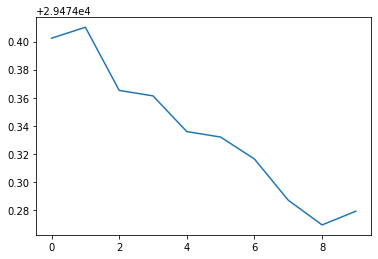

In [8]:
make_plot(history)

In [ ]:
# tf.keras.utils.plot_model(model, to_file='model.png')